Un Padre y Varios Hijos => Con y Sin Traslape

In [4]:
import numpy as np
import logging

# Imports hechos con el team :
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid

class UnPadreVariosHijos:

    def __init__(self, iterations=10, n_children=3, traslape = 0):    # iterations = n ;
        self.iter = iterations
        self.n_children = n_children

        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = np.random.uniform(low=0.0, high=5.0, size=None)       # self.parent es tipo float porque size = 0 sino seria array. Para la funcion de Ackley, los valores serian : low = -32.678 <= xi <= 32.678

        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent]

        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        # Bool to choose between with or without traslape
        self.traslape = traslape

        print()
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x): # Esta funcion se llama en la funcion evaluate(). Esta es la funcion que se debe modificar para agregar la funcion de Ackley
        """
        Function to evaluate a solution.
        """
        return x**3-2*x**2+1

    def evaluate(self, children):
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children)) # Regresa una lista de los resultados de cada uno de los elementos en el array (children) evaluado en la funcion (self.eval_func)

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = self.parent + (-1) ** np.random.randint(0, 2) * np.random.random_sample(size=self.n_children) # children es un array del tamano de n_children (por default seria 3 => [ , , ])
        return np.clip(children, 0, 5) # Regresa el array (children) con en valor de cada casilla modificado. Si el valor es menor a 0, este valor se hace 0. Si el valor es mayor a 5, este valor se hace 5 en el nuevo array

    def run(self):
        counter = 0 # Para que es el counter ???

        for _ in range(self.iter):

            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))

            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))

            # Select the children with the lowest evaluation.
            if self.traslape:
                evaluations = np.concatenate((evaluations, [self.eval_func(self.parent)]), axis=None) # evaluations = listadeEvaluacionesHijos + listadeEvaluacionPadre
            
            if np.argmin(evaluations) < self.n_children:
                self.parent = children[np.argmin(evaluations)] # np.argmin regresa el indice de la casilla con el menor valor en el arreglo (evaluations). self.parent sigue siendo un valor float y el mejor hijo se hace el padre

            # Save the best solution of the iteration.
            self.best_iter.append(self.parent) # best_iter es un arreglo donde iremos guardando la mejor solucion de cada iteracion.

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent)) # Es literalmente lo mismo que hicimos al crear evaluaciones usando el padre inicial.
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1])) # self.evaluaciones[-1] hace referencia a la evaluacion en la ultima casilla del arreglo.
            counter += 1

        return self.best_iter

Un Padre y Varios Hijos => Con y Sin Traslape (FUNCION ACKLEY)

In [5]:
import numpy as np
import logging

# Imports hechos con el team :
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid

class UnPadreVariosHijosFA:

    def __init__(self, iterations=10, n_children=3, traslape = 0):    # iterations = n ;
        self.iter = iterations
        self.n_children = n_children

        # Generate random solutions. For multiple parents and multiple variables, 
        self.parent = np.random.uniform(low=-32.678, high=32.678, size=2)       # size lo cambiamos a 2 para que el parent sea un arreglo con [x1, x2]

        # Save the best initial solution. Since there is only one parent, no selection is required.
        self.best_iter = [self.parent] # best_iter se convierte en un arreglo de arreglos

        # Save the evaluation of the best solution.
        self.evaluaciones = [self.eval_func(self.parent)]

        # Bool to choose between with or without traslape
        self.traslape = traslape

        print()
        # Get the logger.
        self.logger = logging.getLogger(__name__)
        self.logger.info('Initializing algorithm with parent {} and {} children'.format(self.parent, self.n_children))

    def eval_func(self, x): # Esta funcion se llama en la funcion evaluate(). Aqui va la funcion de Ackley.
        """
        Function to evaluate a solution.
        """
        a = 20
        b = 0.2
        c = 2*np.pi
        d = len(x)
        sumatoria1 = 0
        sumatoria2 = 0
        resultado = 0
        
        for i in x:
            sumatoria1 += i**2
            sumatoria2 += cos(i * c)
        
        resultado = -a * exp(-b * sqrt(sumatoria1 / d)) - exp(sumatoria2 / d) + a + exp(1)
        return resultado # El resultado que se regresa es un valor flotante

    def evaluate(self, children): # Llama a la funcion eval_func() para cada uno de los hijos, los cuales son arrays de 2 dimensiones [x1, x2]
        """
        Function that takes multiple solutions and evaluates each of them.
        """
        return list(map(self.eval_func, children)) # Regresa una lista de los resultados de cada uno de los elementos en el array (children) evaluado en la funcion (self.eval_func)

    def mutation(self):
        """
        Function that generates childrens from a single parent. 
        """
        children = []
        for i in range(self.n_children):
            children.append(self.parent + (-1) ** np.random.randint(0, 2) * np.random.random_sample(size = 2))

        return np.clip(children, -32.678, 32.678)
        
    def run(self):
        counter = 0 # Para que es el counter ???

        for _ in range(self.iter):

            # Generate children from one parent.
            children = self.mutation()
            self.logger.debug('Children are {}.'.format(children))

            # Evaluate all children.
            evaluations = self.evaluate(children)
            self.logger.debug('Evaluations are {}.'.format(evaluations))

            # Select the children with the lowest evaluation.
            if self.traslape:
                evaluations = np.concatenate((evaluations, [self.eval_func(self.parent)]), axis=None) # evaluations = listadeEvaluacionesHijos + listadeEvaluacionPadre
            
            if np.argmin(evaluations) < self.n_children:
                self.parent = children[np.argmin(evaluations)] # np.argmin regresa el indice de la casilla con el menor valor en el arreglo (evaluations). self.parent sigue siendo un valor float y el mejor hijo se hace el padre

            # Save the best solution of the iteration.
            self.best_iter.append(self.parent) # best_iter es un arreglo donde iremos guardando la mejor solucion de cada iteracion.

            # Save the best evaluation of the iteration.
            self.evaluaciones.append(self.eval_func(self.parent)) # Es literalmente lo mismo que hicimos al crear evaluaciones usando el padre inicial.
            self.logger.info('New Parent is {} with f(x)={}.'.format(self.parent, self.evaluaciones[-1])) # self.evaluaciones[-1] hace referencia a la evaluacion en la ultima casilla del arreglo.
            counter += 1

        return self.best_iter

Display de los resultados en formato de texto

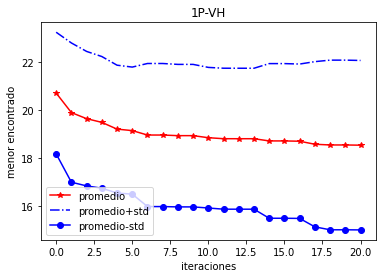

[2.52625811 2.89228391 2.79348428 2.73528404 2.65563512 2.63858362
 2.97195952 2.97200351 2.96002838 2.96002838 2.92048714 2.92801328
 2.9277378  2.9277378  3.2125477  3.2125477  3.20645954 3.43179077
 3.52394648 3.52394648 3.51993383]


NameError: name 'x' is not defined

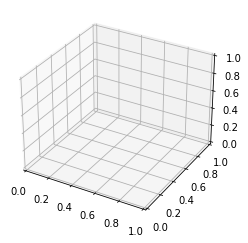

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.ERROR, format='%(asctime)s -%(levelname)s - %(funcName)s -  %(message)s')

logging.getLogger("matplotlib").setLevel(logging.WARNING)

df_experimentos = pd.DataFrame()
experimentos = 10           # Linea que se modifica a cuantos experimentos queremos hacer

def poner_menor(row):
    df.at[row.name, 'menor'] = min(row['evaluacion'], df.iloc[row.name - 1].menor)
    return None

for experimento in range(1, experimentos + 1):
    #algoritmo = UnPadreVariosHijos(iterations=20, n_children=4, traslape=1)         # Linea que se modifica para establecer que algoritmo queremos correr
    algoritmo = UnPadreVariosHijosFA(iterations=20, n_children=4, traslape=1)
    mejores = algoritmo.run()

    # You can access all variables from a class by using the class.name_of_variable
    evaluaciones = algoritmo.evaluaciones
    cantidad = len(mejores)
    logger = logging.getLogger()
    logger.info('Experimento ' + str(experimento))
    logger.info('Cantidad de soluciones {}.'.format(cantidad))
    logger.info('Cantidad de evaluaciones {}.'.format(len(evaluaciones)))

    # Create a dataframe. It is like an excel spreadsheet.
    df = pd.DataFrame(
        {'algoritmo':[algoritmo.__class__.__name__] * cantidad,
         'experimento':[experimento]*cantidad,
         'iteracion':list(range(0, cantidad)),
         'x':mejores,
         'evaluacion':evaluaciones}
    )
    
    # The first row has the lowest value so far.
    df.at[0, 'menor'] = df.loc[0]['evaluacion']

    # For each row, compare the evaluation of the current row and the previous smallest value to find which is smaller.
    df.loc[1:].apply(lambda row: poner_menor(row), axis=1)

    logger.info('\n'+df.to_string())
    df_experimentos = df_experimentos.append(df)

df_experimentos.reset_index(drop=True, inplace=True)
# print(df_experimentos)

# Calculate the average best evaluation per iteration.
resultados = df_experimentos.groupby('iteracion').agg({'menor': ['mean', 'std']})

# print(resultados)

promedios = resultados['menor']['mean'].values
std = resultados['menor']['std'].values
# Plot the average best evaluation for all experiments

plt.plot(promedios, color='red', marker='*')
plt.plot(promedios+std, color='b', linestyle='-.')
plt.plot(promedios-std, color='b', marker='o')
plt.xlabel('iteraciones')
plt.ylabel('menor encontrado')
plt.legend(['promedio', 'promedio+std','promedio-std'])
plt.title('1P-VH')
# Plot the evaluations for all experiments
#for experimento in range(1, experimentos + 1):
#  plt.plot(df_experimentos[df_experimentos.experimento==experimento].evaluacion.values)
plt.show()
figure = plt.figure()
print(std)
axis = figure.gca( projection='3d')
axis.plot_surface(x, y, results, cmap='jet', shade= "false")
plt.show()
